In [2]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='correlations/'
path_nicaea='predictions_nicaea/'
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


Working on bins 1 1


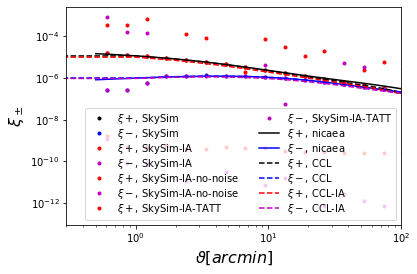

Working on bins 1 2


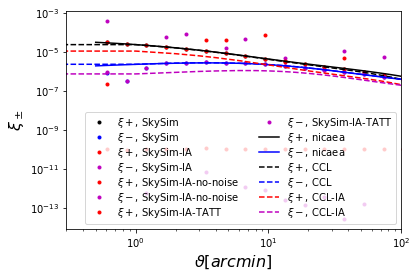

Working on bins 1 3


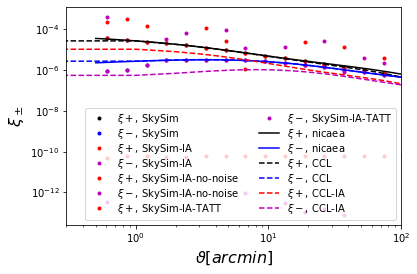

Working on bins 1 4


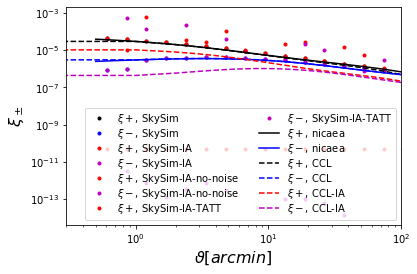

Working on bins 1 5


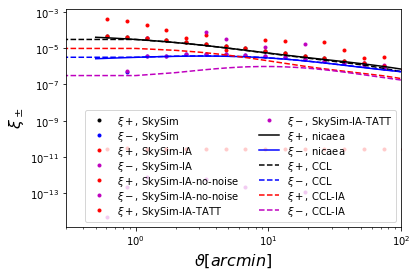

Working on bins 2 2


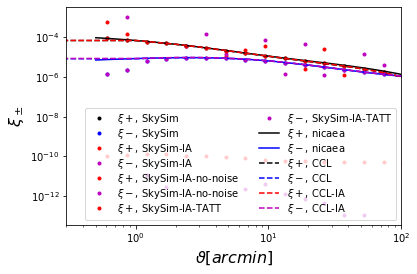

Working on bins 2 3


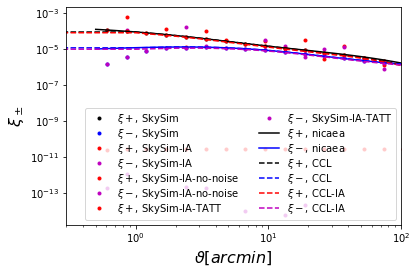

Working on bins 2 4


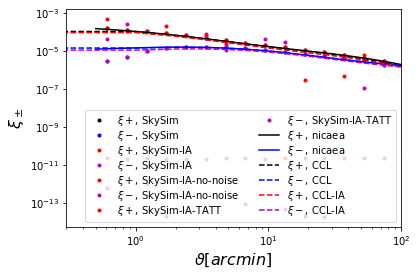

Working on bins 2 5


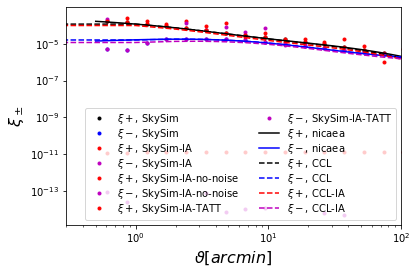

Working on bins 3 3


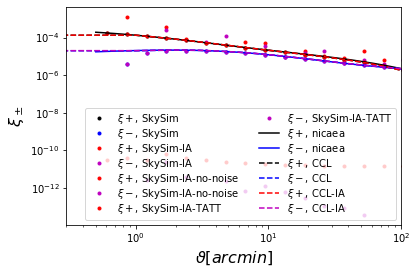

Working on bins 3 4


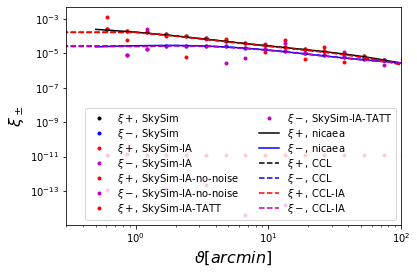

Working on bins 3 5


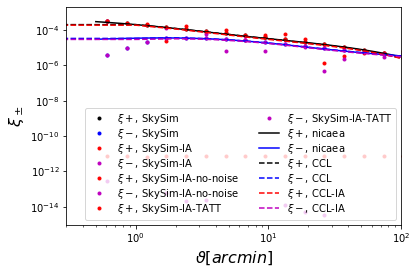

Working on bins 4 4


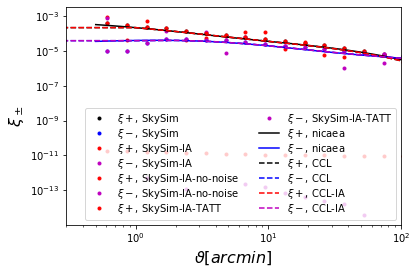

Working on bins 4 5


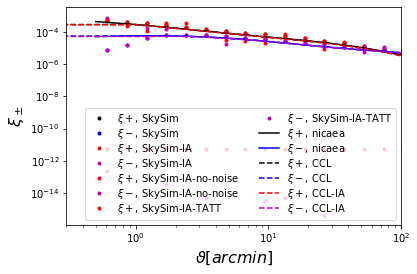

Working on bins 5 5


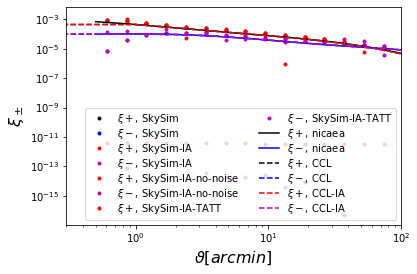

In [5]:
# Load the CCL predictions:
hdul = fits.open('theo_prediction.fits')
data=hdul[1].data
NO_IA_plus=data['NO IA+'] # Xi + (no ia)
NO_IA_minus=data['NO IA-'] # Xi - (no ia)
GI_plus=data['GI+']        #GI + (TATT) 
GI_minus=data['GI-']       #GI - (TATT)
GI_NLA_plus=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus=data['GI_NLA-']  #GI - (NLA)
II_plus=data['II+']           #II + (TATT) 
II_minus=data['II-']         #II -   (TATT)
II_NLA_plus=data['II_NLA+']  #II +   (NLA)
II_NLA_minus=data['II_NLA-']     #II -  (NLA)
theta=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Load the Treecorr measurements:
counter=0
xip=np.empty([20,15])
xim=np.empty([20,15])
xip_IA=np.empty([20,15])
xim_IA=np.empty([20,15])
xip_IA_no_noise=np.empty([20,15])
xim_IA_no_noise=np.empty([20,15])
xip_IA_TATT=np.empty([20,15])
xim_IA_TATT=np.empty([20,15])


for bin1 in np.arange(5)+1:
    for bin2 in range (bin1,6):
    #for bin2 in range (bin1,6):

        
        print('Working on bins', bin1, bin2)
        
        # Get Treecorr measurements
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        filename_IA=path_treecorr+'infused_cross_correlation_tomo{}_{}'.format(bin1,bin2) 
        filename_IA_no_noise=path_treecorr+'infused_cross_correlation_no_noise_tomo{}_{}'.format(bin1,bin2)
        filename_IA_TATT=path_treecorr+'infused_cross_correlation_TATT_tomo{}_{}'.format(bin1,bin2)

        gg = treecorr.GGCorrelation(nbins = 20, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)
        
        #No IA
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim

        # With IA, uncomment when ready
        gg.read(filename_IA)
        xip_IA[:,counter]=gg.xip
        xim_IA[:,counter]=gg.xim

        # With IA, no noise
        gg.read(filename_IA_no_noise)
        xip_IA_no_noise[:,counter]=gg.xip
        xim_IA_no_noise[:,counter]=gg.xim
        
        # TATT
        gg.read(filename_IA_TATT)
        xip_IA_TATT[:,counter]=gg.xip
        xim_IA_TATT[:,counter]=gg.xim
        
        theta=gg.meanr     
        
        #Get xi+ theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        theta_nicaea=file_nicaea[:,0]
        xip_nicaea=file_nicaea[:,2]

        #Get xi- theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        xim_nicaea=file_nicaea[:,2]

        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
                
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus[tomo,:]
        xim_CCL=NO_IA_minus[tomo,:]

        xip_CCL_IA=NO_IA_plus[tomo,:] +GI_NLA_plus[tomo,:] +II_NLA_plus[tomo,:]
        xim_CCL_IA=NO_IA_minus[tomo,:]+GI_NLA_minus[tomo,:]+II_NLA_minus[tomo,:]
        
        
        # no IA
        plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta, xim[:,counter], 'b.', label='$\\xi-$, SkySim')

        # with IA, uncomment when ready
        plt.plot(theta, xip_IA[:,counter], 'r.', label='$\\xi+$, SkySim-IA')
        plt.plot(theta, xim_IA[:,counter], 'm.', label='$\\xi-$, SkySim-IA')
        
         # with IA, no noise
        plt.plot(theta, xip_IA_no_noise[:,counter], 'r.', label='$\\xi+$, SkySim-IA-no-noise')
        plt.plot(theta, xim_IA_no_noise[:,counter], 'm.', label='$\\xi-$, SkySim-IA-no-noise')
        
        # with IA, no noise
        plt.plot(theta, xip_IA_TATT[:,counter], 'r.', label='$\\xi+$, SkySim-IA-TATT')
        plt.plot(theta, xim_IA_TATT[:,counter], 'm.', label='$\\xi-$, SkySim-IA-TATT')


        plt.plot(theta_nicaea, xip_nicaea, 'k-', label='$\\xi+$, nicaea')
        plt.plot(theta_nicaea, xim_nicaea, 'b-', label='$\\xi-$, nicaea')
        plt.plot(theta_CCL, xip_CCL, 'k--', label='$\\xi+$, CCL')
        plt.plot(theta_CCL, xim_CCL, 'b--', label='$\\xi-$, CCL')
        plt.plot(theta_CCL, xip_CCL_IA, 'r--', label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xim_CCL_IA, 'm--', label='$\\xi-$, CCL-IA')
        

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_\\pm$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 100])
        plt.show()
        
        counter +=1



In [13]:
gg.xip


array([ 2.7600e-04,  3.2933e-04,  1.8072e-04,  5.6787e-04,  2.3214e-04,
        2.4897e-04, -1.7064e-05,  2.3482e-05,  2.2785e-05,  5.5791e-05,
        3.7230e-05,  3.0885e-05,  3.7374e-05,  3.3876e-06, -6.1178e-06,
        5.8547e-06,  2.6044e-06,  3.6681e-06, -1.0283e-06,  2.0972e-07])

In [14]:
xip[:,14]

array([8.7028e-04, 7.1519e-04, 5.3774e-04, 4.2356e-04, 3.2182e-04,
       2.4808e-04, 1.9152e-04, 1.4915e-04, 1.1573e-04, 8.8027e-05,
       6.4660e-05, 4.5772e-05, 3.0267e-05, 1.8864e-05, 1.0412e-05,
       4.4407e-06, 1.9858e-06, 3.8429e-07, 5.7409e-07, 5.5593e-07])